<a href="https://colab.research.google.com/github/takyaC/Finance/blob/main/PriceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yahoo_fin

In [2]:
pip install requests_html

     |████████████████████████████████| 92kB 4.9MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
  Created wheel for parse: filename=parse-1.19.0-cp36-none-any.whl size=24582 sha256=7a0c012f9525b04ef1a10893bdd3373f26c70ba29fb8b9318faa22385aab122a
  Stored in directory: /root/.cache/pip/wheels/c0/39/ea/e2fd678bd130953f5438470b8dfa529f00787e9b8b92b27467
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13485 sha256=9c07f7d7570a191e3339e29261dddba1d0c169430b09993c5686ab5b8c2aa788
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: pyppeteer 0.2.5 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: importlib-metadata 3.3.0
    Uninstalling importlib-metadata-3.3.0:
      Successfully uninstalled importlib-metadata

In [87]:
from yahoo_fin.stock_info import get_data
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [4]:
tickers = ["MRNA", "EBS", "BNTX"]

In [5]:
price_data_of_ticker = []
for ticker in tickers:
    try:
      # 株価データ
      price_data = get_data(ticker, "01/01/2019", "01/01/2021", True, "1d") # 1wk
      price_data_of_ticker.append(price_data)
      
    except BaseException as be:
      print("error", be)

              adjclose
2019-01-02   15.330000
2019-01-03   15.500000
2019-01-04   16.959999
2019-01-07   16.270000
2019-01-08   16.950001
...                ...
2020-12-24  123.389999
2020-12-28  111.400002
2020-12-29  114.389999
2020-12-30  111.129997
2020-12-31  104.470001

[505 rows x 1 columns]
             adjclose
2019-01-02  57.700001
2019-01-03  57.540001
2019-01-04  58.790001
2019-01-07  61.549999
2019-01-08  62.700001
...               ...
2020-12-24  93.839996
2020-12-28  92.160004
2020-12-29  90.139999
2020-12-30  92.699997
2020-12-31  89.599998

[505 rows x 1 columns]
             adjclose
2019-10-10  14.240000
2019-10-11  13.820000
2019-10-14  12.750000
2019-10-15  12.920000
2019-10-16  12.940000
...               ...
2020-12-24  96.959999
2020-12-28  88.110001
2020-12-29  88.279999
2020-12-30  83.940002
2020-12-31  81.519997

[310 rows x 1 columns]


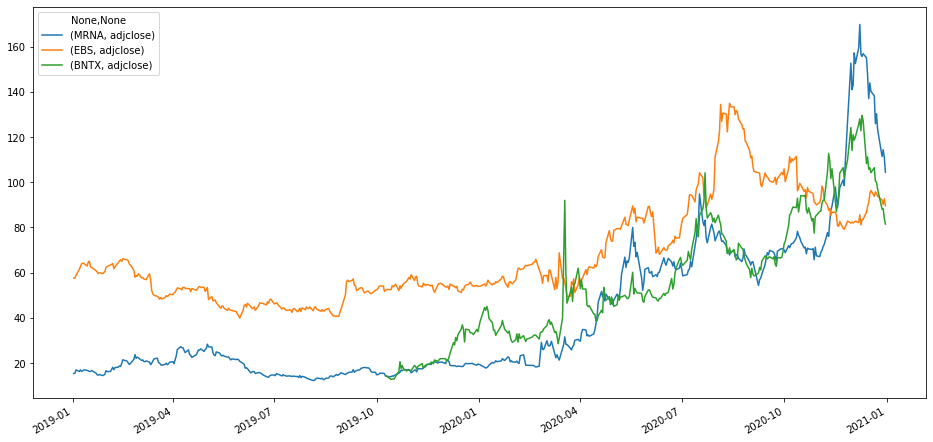

In [ ]:
data_of_ticker = []

index = 0
for ticker in tickers:
    try:
      # 設定
      data = price_data_of_ticker[index].loc[: , ["adjclose"]]
      print(data)
      data_of_ticker.append(data)
      
    except BaseException as be:
      print("error", be)
    
    finally:
      index+=1

dfs = pandas.concat(data_of_ticker, axis=1, keys=tickers)
dfs.loc[:, tickers].interpolate(method='linear').plot(figsize=(16,8))

              adjclose
2019-01-02   15.330000
2019-01-05   16.270000
2019-01-08   16.950001
2019-01-11   17.000000
2019-01-14   16.740000
...                ...
2020-12-19  138.300003
2020-12-22  125.879997
2020-12-25  111.400002
2020-12-28  111.400002
2020-12-31  104.470001

[244 rows x 1 columns]
error: num must be 1 <= num <= 4, not 5
             adjclose
2019-01-02  57.700001
2019-01-05  61.549999
2019-01-08  62.700001
2019-01-11  64.089996
2019-01-14  62.919998
...               ...
2020-12-19  93.809998
2020-12-22  95.769997
2020-12-25  92.160004
2020-12-28  92.160004
2020-12-31  89.599998

[244 rows x 1 columns]
error: num must be 1 <= num <= 4, not 5
              adjclose
2019-10-10   14.240000
2019-10-13   12.750000
2019-10-16   12.940000
2019-10-19   16.280001
2019-10-22   20.639999
...                ...
2020-12-18  104.239998
2020-12-21  106.459999
2020-12-24   96.959999
2020-12-27   88.110001
2020-12-30   83.940002

[150 rows x 1 columns]
error: num must be 1 <= num <= 4

<Figure size 432x288 with 0 Axes>

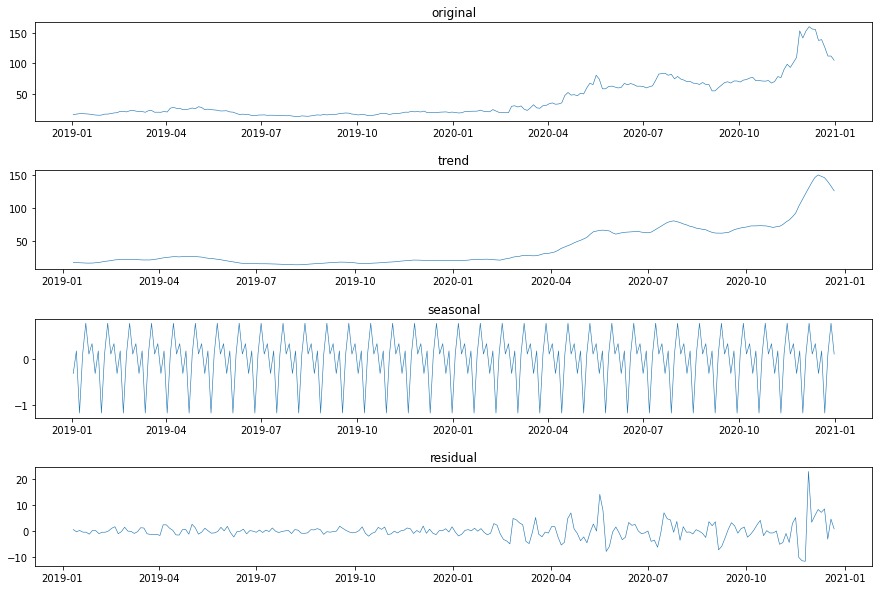

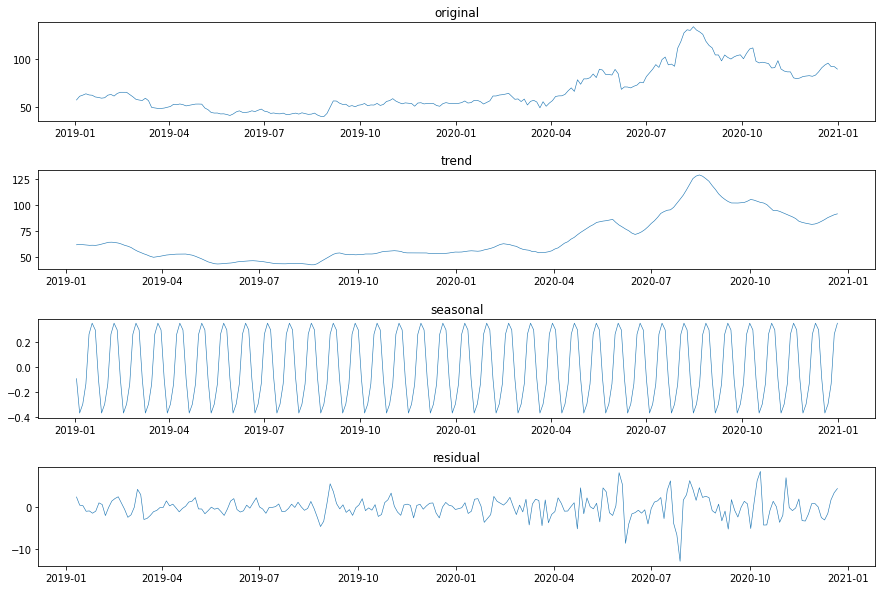

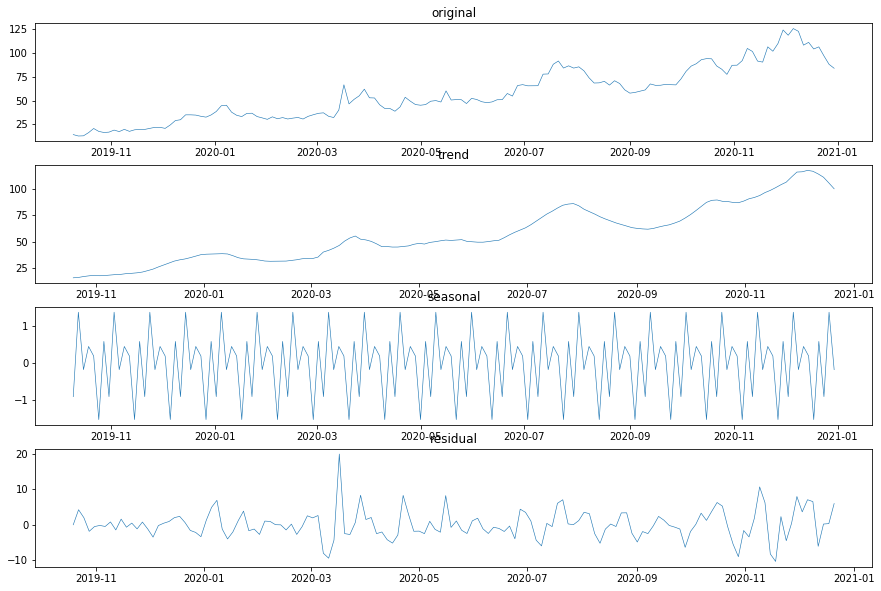

In [82]:
index = 0
for ticker in tickers:
    try:
       data = price_data_of_ticker[index].loc[: , ["adjclose"]]
       # print(data)
       
       # 日単位
       data = data.asfreq(freq='3D', method='bfill')
       print(data)

       # 週単位  
       # https://note.nkmk.me/python-pandas-time-series-resample-asfreq/
      #  data = data.resample('3D').first().bfill()

       res = sm.tsa.seasonal_decompose(data)
       original = data
       trend = res.trend
       seasonal = res.seasonal
       residual = res.resid

       plt.subplots_adjust(hspace=0.5)
       plt.figure(figsize=(15, 10)) 
       plt.subplot(411)

       plt.plot(original, lw=.6)
       plt.title("original")
       plt.subplot(412)

       plt.plot(trend, lw=.6)
       plt.title("trend")
       plt.subplot(413)

       plt.plot(seasonal, lw=.6)
       plt.title("seasonal")
       plt.subplot(414)
       
       plt.plot(residual, lw=.6)
       plt.title("residual")
       plt.subplot(415)
      
      
    except BaseException as be:
      print("error:", be)
    
    finally:
      index+=1


            adjclose
2019-10-22       NaN
2019-10-25       NaN
2019-10-28       NaN
2019-10-31  0.433450
2019-11-03 -1.578658
...              ...
2020-12-18  2.089123
2020-12-21  6.103486
2020-12-24       NaN
2020-12-27       NaN
2020-12-30       NaN

[146 rows x 1 columns]
            adjclose
2019-10-22       NaN
2019-10-25       NaN
2019-10-28       NaN
2019-10-31  1.516479
2019-11-03 -0.146806
...              ...
2020-12-18  6.286626
2020-12-21  2.254192
2020-12-24       NaN
2020-12-27       NaN
2020-12-30       NaN

[146 rows x 1 columns]
            adjclose
2019-10-22       NaN
2019-10-25       NaN
2019-10-28       NaN
2019-10-31 -0.535122
2019-11-03 -0.220194
...              ...
2020-12-18  0.382949
2020-12-21  5.867735
2020-12-24       NaN
2020-12-27       NaN
2020-12-30       NaN

[146 rows x 1 columns]


Text(0.5, 1.0, 'matrix')

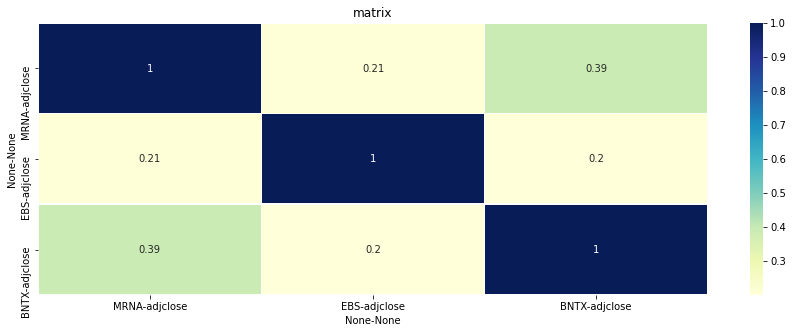

In [94]:
index = 0
data_of_ticker = []
resid_mat = pandas.DataFrame()

for ticker in tickers:
    try:
       data = price_data_of_ticker[index].loc[: , ["adjclose"]]
       data = data['20191022':'20201231']
       data = data.asfreq(freq='3D', method='bfill')
       res = sm.tsa.seasonal_decompose(data)
       
       residual = res.resid
       print(residual) 
       data_of_ticker.append(residual)

    except BaseException as be:
      print("error:", be)
    
    finally:
      index+=1

dfs = pandas.concat(data_of_ticker, axis=1, keys=tickers)
plt.figure(figsize=(15, 5))
sns.heatmap(dfs.corr(), annot=True, lw=0.7, cmap='YlGnBu')
plt.title('matrix')
